<a href="https://colab.research.google.com/github/mylarjeevan/C-CPP-Programming/blob/main/Student_success_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
#load and understand data
df=pd.read_csv('student_success_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None


In [12]:
#encoding the non numerical part to the numerical part
df['Internet']=df['Internet'].map({'No':0,'Yes':1})
df['Passed']=df['Passed'].map({'No':0,'Yes':1})
print(df.head())
print(df.dtypes)

   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40       NaN           5     NaN
1           5          80         60       NaN           6     NaN
2           3          90         75       NaN           8     NaN
3           8          70         50       NaN           5     NaN
4           7          85         70       NaN           7     NaN
StudyHours      int64
Attendance      int64
PastScore       int64
Internet      float64
SleepHours      int64
Passed        float64
dtype: object


your classification report is              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



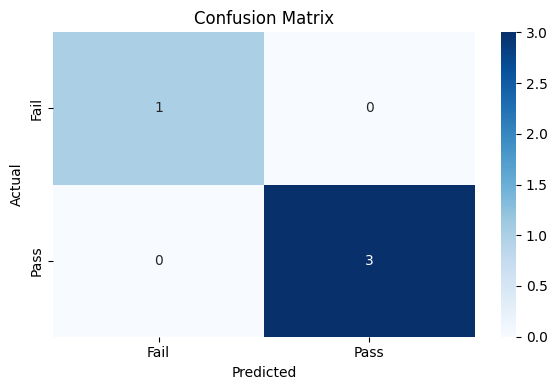

>>>>predict your result<<<<<


In [ ]:
features=['StudyHours','Attendance','PastScore','SleepHours']
scaler=StandardScaler()
df_processed=df.copy() # Create a copy to process, preserving the original df if needed

# Encode 'Internet' and 'Passed' columns to numerical values (0 and 1)
df_processed['Internet'] = df_processed['Internet'].map({'No':0,'Yes':1}).astype(int)
df_processed['Passed'] = df_processed['Passed'].map({'No':0,'Yes':1}).astype(int)

# Scale the numerical features identified in the 'features' list
df_processed[features]=scaler.fit_transform(df_processed[features])

#split and train
X=df_processed.drop('Passed',axis=1) # X now contains numerical 'Internet'
y=df_processed['Passed'] # y now contains numerical 'Passed'
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"your classification report is{classification_report(y_test,y_pred)}")
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
print(">>>>predict your result<<<<<")
try:
  study_hours=float(input("enter your study hours:"))
  attendance=float(input("enter your attendance:"))
  past_score=float(input("enter your pastscore:"))
  sleep_hours=float(input("enter your sleep hours:"))
  internet=int(input("enter your internet (0 for No, 1 for Yes):")) # Clarify input for internet

  # Create a DataFrame for all user inputs, mimicking the structure of X
  user_input_data_raw = pd.DataFrame({
      'StudyHours':[study_hours],
      'Attendance':[attendance],
      'PastScore':[past_score],
      'Internet':[internet], # Include internet directly
      'SleepHours':[sleep_hours]
  })

  # Apply scaling to the relevant columns only
  user_input_data_scaled = user_input_data_raw.copy()
  user_input_data_scaled[features] = scaler.transform(user_input_data_raw[features]) # 'features' list used for scaler

  # Ensure the column order matches X_train's columns for consistent prediction
  user_input_final = user_input_data_scaled[X_train.columns]

  prediction=model.predict(user_input_final)[0]
  result="pass"if prediction==1 else "fail"
  print(f"your result is {result}")
except ValueError:
  print("invalid input")